In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('/content/gdrive/My Drive/Dataset/titanic/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Dataset/titanic/test.csv')

In [5]:
train.info()
print('_'*40+'\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Column Analysis

##Survived

In [7]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


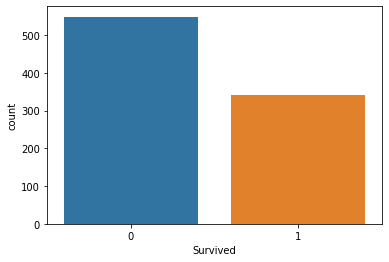

In [8]:
sns.countplot(train['Survived'])

##Pclass

In [9]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


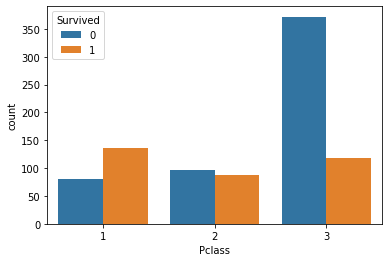

In [10]:
sns.countplot(train['Pclass'],hue = train['Survived'])

##Name

In [11]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [12]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Ms.            1
Lady.          1
Don.           1
the            1
Jonkheer.      1
Capt.          1
Sir.           1
Mme.           1
Name: Name_Title, dtype: int64

In [13]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [14]:
train['Name_Family'] = train['Name'].apply(lambda x: x.split(',')[0])
train['Name_Family'].describe()

count           891
unique          667
top       Andersson
freq              9
Name: Name_Family, dtype: object

In [15]:
train[train['Name_Family'] == 'Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Family
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Mr.,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Miss.,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Miss.,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Mr.,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Miss.,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Miss.,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Mrs.,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Miss.,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Master.,Andersson


In [16]:
train[['Name_Family','Name','SibSp','Parch']][train['Survived'] == 1].head(10)

,Name_Family,Name,SibSp,Parch
1,Cumings,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0
2,Heikkinen,"Heikkinen, Miss. Laina",0,0
3,Futrelle,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0
8,Johnson,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,2
9,Nasser,"Nasser, Mrs. Nicholas (Adele Achem)",1,0
10,Sandstrom,"Sandstrom, Miss. Marguerite Rut",1,1
11,Bonnell,"Bonnell, Miss. Elizabeth",0,0
15,Hewlett,"Hewlett, Mrs. (Mary D Kingcome)",0,0
17,Williams,"Williams, Mr. Charles Eugene",0,0
19,Masselmani,"Masselmani, Mrs. Fatima",0,0


In [17]:
train['Name'][train['Name'].apply(lambda x:len(x))>30].head(20)

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
25    Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
31       Spencer, Mrs. William Augustus (Marie Eugenie)
38                   Vander Planke, Miss. Augusta Maria
40       Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
41    Turpin, Mrs. William John Robert (Dorothy Ann ...
43             Laroche, Miss. Simonne Marie Anne Andree
49        Arnold-Franchi, Mrs. Josef (Josefine Franchi)
52             Harper, Mrs. Henry Sleeper (Myna Haxtun)
53    Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...
59                   Goodwin, Master. William Fr

In [18]:
train['Name_Alias'] = train['Name'].apply(lambda x: 1 if '(' in x else 0)
train['Survived'].groupby(train['Name_Alias']).mean()

Name_Alias
0    0.310160
1    0.769231
Name: Survived, dtype: float64

##Sex

In [19]:
train['Sex'].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [20]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

##Age

In [21]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

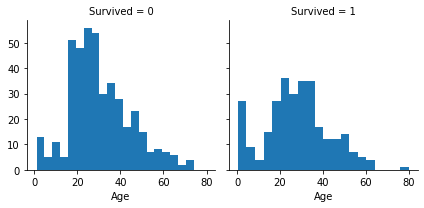

In [22]:
g = sns.FacetGrid(train,col = 'Survived')
g.map(plt.hist, 'Age',bins = 20)

In [24]:
train['Age_Range'] = pd.cut(train['Age'],[0,15,30,60,90])
x = train[train.notnull()]
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Family,Name_Alias,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Braund,0,"(15, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Cumings,1,"(30, 60]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Heikkinen,0,"(15, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Futrelle,1,"(30, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,Allen,0,"(30, 60]"


In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Name_Title   891 non-null    object  
 13  Name_Family  891 non-null    object  
 14  Name_Alias   891 non-null    int64   
 15  Age_Range    714 non-null    category
dtypes: category(1), float64(2), int64(6), object(7)
memory usage: 105.6+ KB


In [27]:
train['Survived'].groupby(train['Age_Range']).mean()

Age_Range
(0, 15]     0.590361
(15, 30]    0.358896
(30, 60]    0.420495
(60, 90]    0.227273
Name: Survived, dtype: float64

In [28]:
pd.qcut(train['Age'],20).value_counts()

(20.125, 22.0]    52
(17.0, 19.0]      51
(31.8, 34.0]      50
(28.0, 30.0]      47
(22.0, 24.0]      46
(34.0, 36.0]      41
(0.419, 4.0]      40
(45.0, 50.0]      39
(41.0, 45.0]      39
(4.0, 14.0]       37
(14.0, 17.0]      36
(25.0, 27.0]      36
(56.0, 80.0]      35
(38.0, 41.0]      35
(50.0, 56.0]      29
(27.0, 28.0]      25
(24.0, 25.0]      24
(30.0, 31.8]      19
(36.0, 38.0]      18
(19.0, 20.125]    15
Name: Age, dtype: int64

##SibSp & Parch

In [29]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [30]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [32]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
def check_family(x):
  return 1 if ((x['SibSp'] !=0) | (x['Parch'] != 0)) else 0

In [34]:
train['Family'] = train.apply(check_family, axis = 1)

In [35]:
train['Survived'].groupby(train['Family']).mean()

Family
0    0.303538
1    0.505650
Name: Survived, dtype: float64

In [36]:
train.groupby(['Family','Pclass']).agg({'Survived':'mean'})

Survived
Family Pclass          
0      1       0.532110
       2       0.346154
       3       0.212963
1      1       0.728972
       2       0.637500
       3       0.299401

##Ticket

In [37]:
train[['Ticket','Survived']].head(10)

,Ticket,Survived
0,A/5 21171,0
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,1
4,373450,0
5,330877,0
6,17463,0
7,349909,0
8,347742,1
9,237736,1


In [38]:
def ticket_code(x):
  pt = x['Ticket'].split()
  if len(pt) == 1:
    if pt[0].isdigit():
      code = 'N'
    else:
      code = pt[0][0]
  else:
    code = pt[0][0]

  return code

In [39]:
train['Ticket_Code'] = train.apply(ticket_code,axis = 1)

In [40]:
def num(x):
  pt = x['Ticket'].split()
  if pt[-1].isdigit():
    num = pt[-1]
  else:
    num = 1601
  return num

In [41]:
train[train['Ticket'] == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Family,Name_Alias,Age_Range,Family,Ticket_Code
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr.,Leonard,0,"(30, 60]",0,L
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr.,Tornquist,0,"(15, 30]",0,L
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr.,Johnson,0,"(15, 30]",0,L
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr.,Johnson,0,"(30, 60]",0,L


In [42]:
x.loc[302]

PassengerId                                303
Survived                                     0
Pclass                                       3
Name           Johnson, Mr. William Cahoone Jr
Sex                                       male
Age                                         19
SibSp                                        0
Parch                                        0
Ticket                                    LINE
Fare                                         0
Cabin                                      NaN
Embarked                                     S
Name_Title                                 Mr.
Name_Family                            Johnson
Name_Alias                                   0
Age_Range                             (15, 30]
Name: 302, dtype: object

In [43]:
#train['Ticket_Number']
x = train.apply(num,axis = 1)
x.mode()

0      1601
1      2343
2    347082
dtype: object

In [44]:
x.describe()

count      891
unique     679
top       1601
freq         7
dtype: object

In [45]:
x.replace(np.nan, x.mode)
x

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Length: 891, dtype: object

In [46]:
train[['Ticket','Survived']][train['Ticket'].apply(lambda x: '347082' in str(x))]

,Ticket,Survived
13,347082,0
119,347082,0
541,347082,0
542,347082,0
610,347082,0
813,347082,0
850,347082,0


In [47]:
train['Survived'].groupby(train['Ticket_Code']).mean()

Ticket_Code
A    0.068966
C    0.340426
F    0.571429
L    0.250000
N    0.384266
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [48]:
train['Ticket_Code'].value_counts()

N    661
S     65
P     65
C     47
A     29
W     13
F      7
L      4
Name: Ticket_Code, dtype: int64

##Fare

In [49]:
train['Survived'].groupby(pd.qcut(train['Fare'], 5)).mean()

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

##Cabin

In [50]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [51]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [52]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [53]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [54]:
train[train['Cabin_Letter'] != 'n'].tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Family,Name_Alias,Age_Range,Family,Ticket_Code,Cabin_Letter
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr.,Leader,1,"(30.0, 60.0]",0,N,D
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,Master.,Carter,0,"(0.0, 15.0]",1,N,B
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,Mr.,Andrews,0,"(30.0, 60.0]",0,N,A
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S,Mrs.,Chambers,1,"(30.0, 60.0]",1,N,E
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S,Mr.,Fry,0,NaN,0,N,B
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,Mrs.,Hays,1,"(30.0, 60.0]",1,N,B
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S,Mrs.,Moor,1,"(15.0, 30.0]",1,N,E
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,Mrs.,Stone,1,"(60.0, 90.0]",0,N,B
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,Miss.,Compton,0,"(30.0, 60.0]",1,P,E
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,Mr.,Marechal,0,NaN,0,N,C


##Embarked

In [55]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [56]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

#Feature Engineering

In [57]:
def names(train, test):
    for i in [train, test]:
        #i['Name_Family'] = i['Name'].apply(lambda x: x.split(',')[0])
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        i['Name_Alias'] = i['Name'].apply(lambda x: 1 if '(' in x else 0)
    return train, test

In [58]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
        #i['Age_Range'] = pd.cut(i['Age'],[0,6,17,30,40,60,90])
    return train, test

In [59]:
def family(train,test):
    for i in [train,test]:
        i['Family'] = np.where(((i['SibSp'] !=0) | (i['Parch'] != 0)),1,0)
    return train, test

In [60]:
def code(x):
  pt = x['Ticket'].split()
  if len(pt) == 1:
    if pt[0].isdigit():
      code = 'N'
    else:
      code = pt[0][0]
  else:
    code = pt[0][0]
  return code

def num(x):
  pt = x['Ticket'].split()
  if pt[-1].isdigit():
    num = int(pt[-1])
  else:
    num = 1601
  return num

def ticket_code(train,test):
  for i in [train,test]:
    #i['Ticket_Number'] = i.apply(num, axis = 1)
    i['Ticket_Code'] = i.apply(code,axis = 1)
  return train, test

In [61]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
    return train, test

In [62]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [63]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Code', 'Cabin_Letter','Age_Null_Flag','Name_Title','Name_Alias','Family']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [64]:
def drop(train, test):
    for i in [train, test]:
        del i['Name']
        del i['PassengerId']
        del i['SibSp']
        del i['Parch']
        del i['Cabin']
        del i['Ticket']
    return train, test

In [65]:
train = pd.read_csv('/content/gdrive/My Drive/Dataset/titanic/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Dataset/titanic/test.csv')
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = family(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_code(train, test)
train, test = dummies(train, test)
train, test = drop(train, test)

In [66]:
print(train.shape)
print(test.shape)

(891, 41)
(418, 40)


#Hypermarameter Tuning

In [67]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [68]:
x_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]

scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
test = scale_x.transform(test)

##<b>Model KNeighborsClassifier</b>

In [69]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors':np.arange(15,30),'weights':['uniform','distance']}
modelknn = GridSearchCV(knn,param_knn,scoring = 'roc_auc',cv = 5,return_train_score = True)
modelknn.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [70]:
modelknn.best_score_

0.8576474178894461

In [71]:
modelknn.best_params_

{'n_neighbors': 27, 'weights': 'uniform'}

##<b>Model DecisionTreeClassifier</b>

In [72]:
dtc = DecisionTreeClassifier()
param_dtc = {'criterion':['gini', 'entropy'],'splitter':['best', 'random']}
modeldtc = GridSearchCV(dtc,param_dtc,scoring = 'roc_auc',cv = 5,return_train_score = True)
modeldtc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [73]:
modeldtc.best_score_

0.7959061774980144

##<b>Model RandomForestClassifier</b>

In [74]:
rfc = RandomForestClassifier()
param_rfc = {'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
modelrfc = GridSearchCV(rfc,param_rfc,scoring = 'roc_auc',cv = 5,return_train_score = True)
modelrfc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [75]:
modelrfc.best_score_

0.8637688642922811

## <b>Model Perceptron

In [76]:
pt = Perceptron()
param_pt = {'penalty':['l2', 'l1','elasticnet']}
modelpt = GridSearchCV(pt,param_pt,scoring = 'roc_auc',cv = 10,return_train_score = True)
modelpt.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l2', 'l1', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [77]:
modelpt.best_score_

0.7936897263956089

## <b> Model SGDClassifier

In [78]:
sg = SGDClassifier(loss = 'log')
param_sg = {'penalty':['l2', 'l1','elasticnet']}
modelsg = GridSearchCV(sg,param_sg,scoring = 'roc_auc',cv = 10,return_train_score = True)
modelsg.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l2', 'l1', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [79]:
modelsg.best_score_

0.7984171971819031

#Predict

In [80]:
predictions = modelrfc.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('/content/gdrive/My Drive/Dataset/titanic/test.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('predict.csv', sep=",", index = False)

In [81]:
predictions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
